# Análise nascidos em Roraima em 2019

#### A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

In [4]:
sinasc_RO = pd.read_csv('SINASC_RO_2019.csv')
sinasc_RO.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


#### Categorizando a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [7]:
sinasc_RO.loc[(sinasc_RO['APGAR5'] >= 0.0) & (sinasc_RO['APGAR5'] <= 3.0), 'class_asfixia'] = 'asfixia grave'
sinasc_RO.loc[(sinasc_RO['APGAR5'] >= 4.0) & (sinasc_RO['APGAR5'] <= 5.0), 'class_asfixia'] = 'asfixia moderada'
sinasc_RO.loc[(sinasc_RO['APGAR5'] >= 6.0) & (sinasc_RO['APGAR5'] <= 7.0), 'class_asfixia'] = 'asfixia leve'
sinasc_RO.loc[(sinasc_RO['APGAR5'] >= 8.0) & (sinasc_RO['APGAR5'] <= 10.0), 'class_asfixia'] = 'normal'

sinasc_RO.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea,class_asfixia
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273,normal
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal


#### Montando um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO):

Text(0.5, 1.0, 'Gráfico APGAR5 por sexo para cada grupo de tempo de gestação')

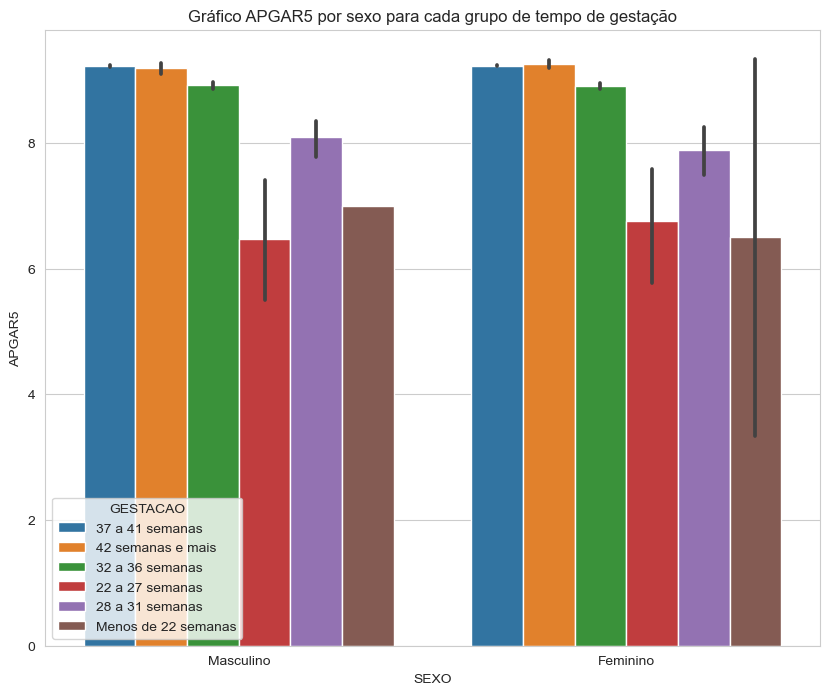

In [191]:
ax = sns.barplot(data = sinasc_RO,
                 x = 'SEXO',
                 y = 'APGAR5',
                 hue = 'GESTACAO'
                )
ax.set_title('Gráfico APGAR5 por sexo para cada grupo de tempo de gestação')

#### Montando uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas:

In [12]:
APGAR5_GESTACAO = pd.crosstab(sinasc_RO['GESTACAO'], sinasc_RO['APGAR5'])
APGAR5_GESTACAO

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,7,0,8,6,1,0,2,10,24,19,8
28 a 31 semanas,0,0,2,1,5,7,7,11,61,55,13
32 a 36 semanas,2,2,2,2,8,11,17,56,362,1307,465
37 a 41 semanas,5,20,3,5,7,21,45,151,1417,13565,7284
42 semanas e mais,1,0,0,0,0,1,1,5,44,423,223
Menos de 22 semanas,1,0,1,0,0,0,0,1,0,3,1


#### Calculando os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado:

In [15]:
APGAR5_GESTACAO_pct = APGAR5_GESTACAO.div(APGAR5_GESTACAO.sum(axis = 1), axis = 0)
APGAR5_GESTACAO_pct

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,0.082353,0.000000,0.094118,0.070588,0.011765,0.000000,0.023529,0.117647,0.282353,0.223529,0.094118
28 a 31 semanas,0.000000,0.000000,0.012346,0.006173,0.030864,0.043210,0.043210,0.067901,0.376543,0.339506,0.080247
32 a 36 semanas,0.000895,0.000895,0.000895,0.000895,0.003581,0.004924,0.007610,0.025067,0.162041,0.585049,0.208147
37 a 41 semanas,0.000222,0.000888,0.000133,0.000222,0.000311,0.000932,0.001998,0.006704,0.062913,0.602273,0.323403
42 semanas e mais,0.001433,0.000000,0.000000,0.000000,0.000000,0.001433,0.001433,0.007163,0.063037,0.606017,0.319484
Menos de 22 semanas,0.142857,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.428571,0.142857


#### Gráfico de barras da tabela cruzada acima:

 Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Vejamos se este conjunto de dados corrobora ou não com a afirmação dos médicos.

Text(0, 0.5, 'Escala')

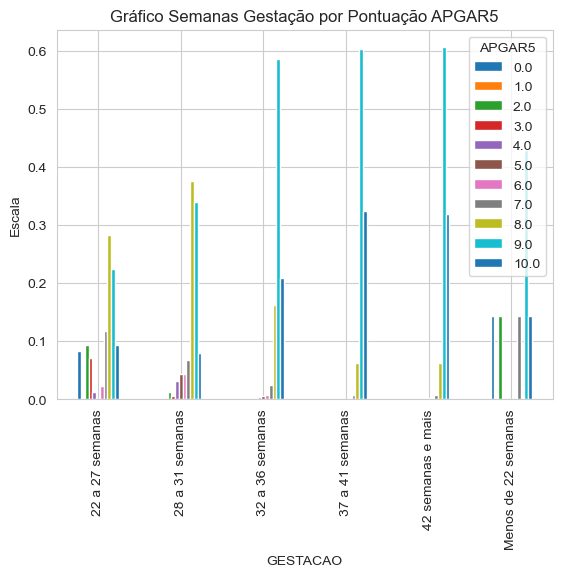

In [18]:
ax = APGAR5_GESTACAO_pct.plot.bar()
ax.set_title('Gráfico Semanas Gestação por Pontuação APGAR5')
ax.set_ylabel('Escala')

De acordo com os dados e as analises feitas através do gráfico, pode-se concluir que a informação passada pelos médicos corrobora com os dados apresentados. Visto que quanto maior a nota do APGAR5 mais saudável é o nascido, sendo assim a concentração de notas mais altas se encontram na faixa das 37 a 41 semanas.

#### Verificando se há relação entre APGAR5 e o peso do bebê:

In [21]:
#Estudando as caracteristicas das variáveis a serem analisadas
sinasc_RO[['APGAR5', 'PESO']].describe()

,APGAR5,PESO
count,26925.000000,27028.000000
mean,9.179164,3243.190654
std,0.790574,544.754096
min,0.000000,258.000000
25%,9.000000,2965.000000
50%,9.000000,3270.000000
75%,10.000000,3575.000000
max,10.000000,5985.000000


Text(0, 0.5, 'Peso (g)')

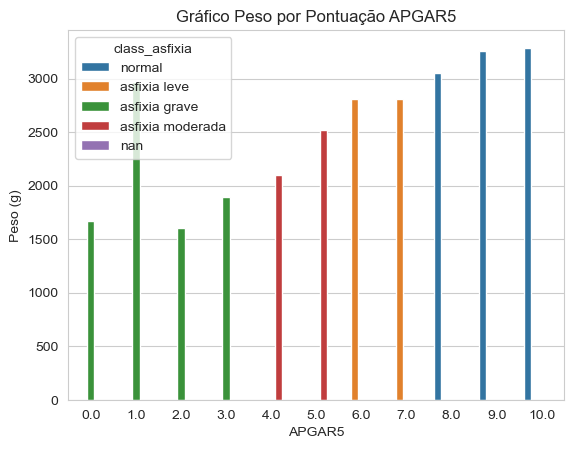

In [23]:
peso_apgar5_bar = sns.barplot(data = sinasc_RO,
                              x = 'APGAR5',
                              y = 'PESO',
                              hue = 'class_asfixia',
                              errorbar = None
                              )
peso_apgar5_bar.set_title('Gráfico Peso por Pontuação APGAR5')
peso_apgar5_bar.set_ylabel('Peso (g)')

Com o gráfico de barras percebe-se que quando relacionada a variável de PESO com APGAR5, em conjunto com class_asfixia, os pesos acima de 3 kg possuem pontuação APGAR5 maiores que 8, sendo estas as melhores possíveis de acordo com a classificação feita anteriormente. 

Text(0.5, 9.444444444444438, 'Peso (g)')

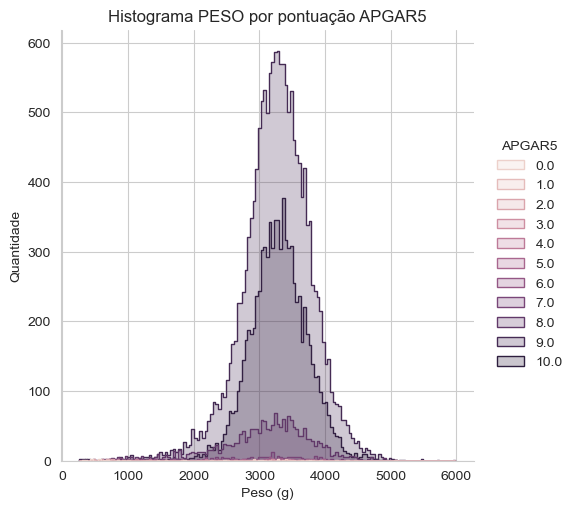

In [25]:
#Analisando a relação do peso com a pontuação apgar5 através do histograma
peso_apgar5_dis = sns.displot(data = sinasc_RO,
            x = 'PESO',
            hue = 'APGAR5',
            element = 'step',
            )
plt.title('Histograma PESO por pontuação APGAR5')
plt.ylabel('Quantidade')
plt.xlabel('Peso (g)')

De acordo com o histograma vemos que a maior concentração de informações sobre o peso dos nascidos vivos está na faixa dos 2,5 kg e 4 kg, com a coloração de cada pontuação se distinguindo. Porém, para uma analise mais detalhada e para entender melhor a distribuição dos valores de peso para boas pontuações do APGAR5, podemos filtrar da seguinte forma:

In [27]:
#Filtrando as pontuções que forem maiores que 8
sinasc_RO['APGAR_maior8'] = sinasc_RO['APGAR5'] >= 8

Text(0.5, 9.444444444444438, 'Peso (g)')

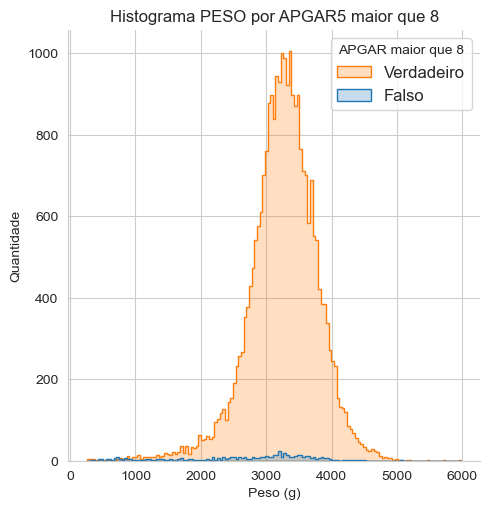

In [29]:
#Analisando apenas para apgar5 maiores que 8
peso_apgar5_dis_maior8 = sns.displot(data = sinasc_RO,
            x = 'PESO',
            hue = 'APGAR_maior8',
            element = 'step',
            legend = False
            )

plt.legend(labels = ['Verdadeiro', 'Falso'],
           title = 'APGAR maior que 8',
           fontsize = "large",
           title_fontsize = "10",
           )

plt.title('Histograma PESO por APGAR5 maior que 8')
plt.ylabel('Quantidade')
plt.xlabel('Peso (g)')

Portanto, de acordo com as analises pode-se concluir que nascidos vivos que possuem um peso acima de 2,5 kg até 4 kg possuem a mais alta pontuação de APGAR5. Sendo aqueles com 3,5 kg  a maior concentração de pontuação acima de 8. 